# Business Understanding / Problem Definition

## Project Goal
Build a classification model to predict which SyriaTel customers will churn, so the company can target retention efforts on high-risk customers before they leave.

## Context
Customer churn is a critical business challenge in the telecommunications industry, directly impacting revenue and growth. Insights from customer behavior patterns can help companies like SyriaTel develop targeted retention strategies and improve customer loyalty. Understanding the factors that influence customer churn enables businesses to proactively address issues and enhance customer experience.

### Stakeholder
SyriaTel's Chief Marketing Officer and Customer Retention Team are responsible for maintaining customer relationships and reducing churn. Predictive insights from this analysis will help them identify at-risk customers and optimize retention resource allocation.

### Problem Statement
This project aims to predict whether a customer will churn (stop using SyriaTel's services) based on usage patterns, account information, and customer service interactions. By modeling churn likelihood, we can:

1. Identify key factors associated with customer churn.

2. Predict churn probability for individual customers.

3. Enable targeted retention campaigns and personalized interventions.

### Scope and Evaluation

The analysis includes:

1. Exploratory Data Analysis (EDA).

2. Feature engineering and preprocessing.

3. Model training using classification algorithms.

4. Evaluation using accuracy, precision, recall, F1-score, and primarily ROC-AUC to measure model performance.


### Business Value
Predictive insights enable SyriaTel to:

1. Identify high-risk customers before they leave.

2. Design personalized retention offers and interventions.

3. Reduce customer acquisition costs by improving retention rates.

4. Increase customer lifetime value and overall profitability.



In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split



In [2]:
# Load CSV file
df = pd.read_csv('SyriaTel.csv')

## Data Understanding

Perform EDA (Exploratory Data Analysis) by:

* Exploring data structure, correlations and visualizations      


In [3]:
# Check dataset
df.head(5)

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [4]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [5]:
df.shape

(3333, 21)

In [6]:
df.describe()

account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

### Visualizations before cleaning

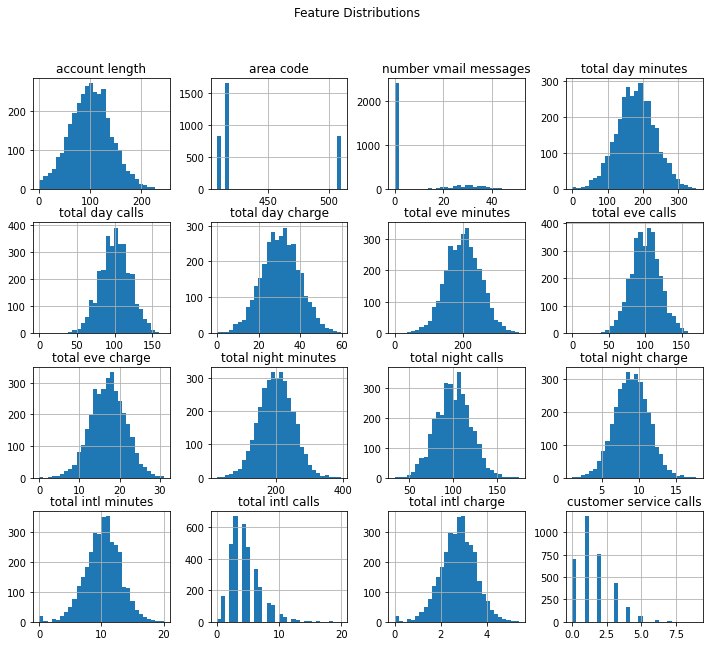

In [7]:
# Feature distributions before data cleaning
df.select_dtypes(include=[np.number]).hist(bins=30, figsize=(12, 10))
plt.suptitle('Feature Distributions')
plt.show()

## Data Cleaning

1. Handle missing values and duplicates
2. Standardize column names
3. Convert data types and encode categorical variables
4. Remove non-predictive and highly correlated features
5. Normalize numeric data
6. One-hot encode remaining categorical variables

In [8]:
# Missing values
print("Missing values:")
print(df.isnull().sum())

Missing values:
state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


In [9]:
# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [10]:
# Replace spaces with underscores in column names
df.columns = df.columns.str.replace(' ', '_')
print("Column names with underscores:")
print(df.columns.tolist())

Column names with underscores:
['state', 'account_length', 'area_code', 'phone_number', 'international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'customer_service_calls', 'churn']


In [11]:
# Remove white spaces from column names
df.columns = df.columns.str.strip()

print("Column names after removing white spaces:")
print(df.columns.tolist())

Column names after removing white spaces:
['state', 'account_length', 'area_code', 'phone_number', 'international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'customer_service_calls', 'churn']


In [12]:
# Check current column names
print("Current columns:")
print(df.columns.tolist())

# Check if you already dropped these columns
print("\nShape:", df.shape)

Current columns:
['state', 'account_length', 'area_code', 'phone_number', 'international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'customer_service_calls', 'churn']

Shape: (3333, 21)


In [13]:
# Data type conversions
df['churn'] = df['churn'].astype(int)
df['international_plan'] = df['international_plan'].map({'yes': 1, 'no': 0})
df['voice_mail_plan'] = df['voice_mail_plan'].map({'yes': 1, 'no': 0})

print(df.dtypes)


state                      object
account_length              int64
area_code                   int64
phone_number               object
international_plan          int64
voice_mail_plan             int64
number_vmail_messages       int64
total_day_minutes         float64
total_day_calls             int64
total_day_charge          float64
total_eve_minutes         float64
total_eve_calls             int64
total_eve_charge          float64
total_night_minutes       float64
total_night_calls           int64
total_night_charge        float64
total_intl_minutes        float64
total_intl_calls            int64
total_intl_charge         float64
customer_service_calls      int64
churn                       int32
dtype: object


In [14]:
# Drop phone number - unique identifier not useful for prediction
df = df.drop('phone_number', axis=1)
print("Dropped phone_number - unique identifier, no predictive value")
print("New shape:", df.shape)

Dropped phone_number - unique identifier, no predictive value
New shape: (3333, 20)


#### Checking for and removing multicollinearity (correlated predictors)


In [15]:
# Create the correlation matrix
correlation_matrix = df.corr()

# Find highly correlated pairs
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            high_corr_pairs.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j], 
                correlation_matrix.iloc[i, j]
            ))

print("Highly correlated pairs (>0.8):")
for pair in high_corr_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")


Highly correlated pairs (>0.8):
number_vmail_messages - voice_mail_plan: 0.957
total_day_charge - total_day_minutes: 1.000
total_eve_charge - total_eve_minutes: 1.000
total_night_charge - total_night_minutes: 1.000
total_intl_charge - total_intl_minutes: 1.000


In [16]:
df = df.drop(['total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge'], axis=1)
print("Removed charge columns. New shape:", df.shape)

Removed charge columns. New shape: (3333, 16)


#### Normalizing numeric data

In [17]:
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("Numeric data normalized")

Numeric data normalized


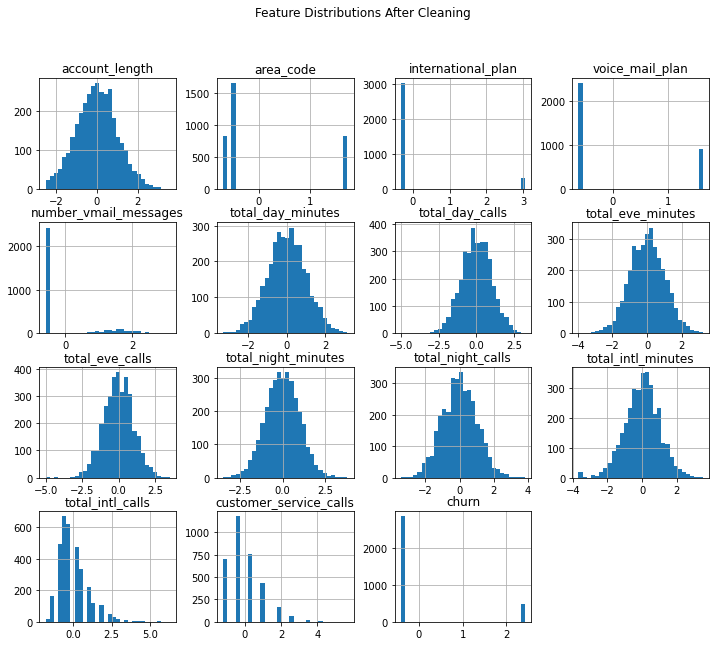

In [18]:
# Feature distributions after data cleaning
df.select_dtypes(include=[np.number]).hist(bins=30, figsize=(12, 10))
plt.suptitle('Feature Distributions After Cleaning')
plt.show()

In [19]:
# Drop international_plan and voice_mail_plan - they're empty after conversion
df = df.drop(['international_plan', 'voice_mail_plan'], axis=1)
print("Dropped empty columns after conversion")
print("Final shape:", df.shape)

Dropped empty columns after conversion
Final shape: (3333, 14)


#### Convert categorical data to numeric format through one-hot encoding

In [20]:
# One-hot encode the 'state' column
df = pd.get_dummies(df, columns=['state'], drop_first=True)
print("One-hot encoding completed. New shape:", df.shape)

One-hot encoding completed. New shape: (3333, 63)


In [21]:
# Check the values in state columns
state_columns = [col for col in df.columns if col.startswith('state_')]
print("Sample values from state columns:")
print(df[state_columns].head())

Sample values from state columns:
   state_AL  state_AR  state_AZ  state_CA  state_CO  state_CT  state_DC  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   state_DE  state_FL  state_GA  ...  state_SD  state_TN  state_TX  state_UT  \
0         0         0         0  ...         0         0         0         0   
1         0         0         0  ...         0         0         0         0   
2         0         0         0  ...         0         0         0         0   
3         0         0         0  ...         0         0         0         0   
4         0         0         0  ...         0         0         0         0   

   state_VA  state_VT  state_WA  s

## Modeling

**Classification Task**: Binary classification (churn vs no churn)

**Models**:
- Logistic Regression (baseline)
- Decision Tree (non-parametric)

**Validation**: 70-30 train/test split

**Overfitting Prevention**:
- Regularization for logistic regression
- Tree pruning for decision tree
- Cross-validation

**Performance Targets**:
- Primary: ROC-AUC > 0.85
- Critical: Recall > 0.80
- Minimum: Accuracy > 0.80


In [22]:
# Classification Task: Binary classification (churn vs no churn)
print("Classification: Binary")
print("Target variable: churn")
print("Classes:", df['churn'].unique())
print("Class distribution:")
print(df['churn'].value_counts())

Classification: Binary
Target variable: churn
Classes: [-0.41167182  2.42911941]
Class distribution:
-0.411672    2850
 2.429119     483
Name: churn, dtype: int64


In [23]:
# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Initialize models
logistic_model = LogisticRegression(random_state=42)
decision_tree_model = DecisionTreeClassifier(random_state=42)

print("Models initialized:")
print("- Logistic Regression (baseline)")
print("- Decision Tree (non-parametric)")

Models initialized:
- Logistic Regression (baseline)
- Decision Tree (non-parametric)


In [24]:
# Fix target column first
df['churn'] = (df['churn'] > 0).astype(int)

# Split data into features and target
X = df.drop('churn', axis=1)
y = df['churn']

# Train/test split (70-30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Data split completed:")
print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")
print("Target values:", y.unique())

Data split completed:
Training set: (2333, 62)
Testing set: (1000, 62)
Target values: [0 1]


In [25]:
# Train the models
logistic_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)

print("Models trained successfully")
print("Logistic Regression trained")
print("Decision Tree trained")

Models trained successfully
Logistic Regression trained
Decision Tree trained


In [26]:
# Make predictions
y_pred_logistic = logistic_model.predict(X_test)
y_pred_tree = decision_tree_model.predict(X_test)

print("Predictions made for both models")

Predictions made for both models


In [27]:
# Evaluate models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("=== Logistic Regression Performance ===")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Precision:", precision_score(y_test, y_pred_logistic))
print("Recall:", recall_score(y_test, y_pred_logistic))
print("F1-Score:", f1_score(y_test, y_pred_logistic))

print("\n=== Decision Tree Performance ===")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Precision:", precision_score(y_test, y_pred_tree))
print("Recall:", recall_score(y_test, y_pred_tree))
print("F1-Score:", f1_score(y_test, y_pred_tree))

=== Logistic Regression Performance ===
Accuracy: 0.865
Precision: 0.6086956521739131
Recall: 0.19310344827586207
F1-Score: 0.29319371727748694

=== Decision Tree Performance ===
Accuracy: 0.875
Precision: 0.5746268656716418
Recall: 0.5310344827586206
F1-Score: 0.5519713261648745


In [28]:
# ROC-AUC scores
y_pred_proba_logistic = logistic_model.predict_proba(X_test)[:, 1]
y_pred_proba_tree = decision_tree_model.predict_proba(X_test)[:, 1]

print("ROC-AUC Scores:")
print("Logistic Regression:", roc_auc_score(y_test, y_pred_proba_logistic))
print("Decision Tree:", roc_auc_score(y_test, y_pred_proba_tree))

ROC-AUC Scores:
Logistic Regression: 0.7393748739665255
Decision Tree: 0.732183908045977


In [29]:
# Compare with performance targets
print("=== Performance vs Targets ===")
logistic_auc = roc_auc_score(y_test, y_pred_proba_logistic)
tree_auc = roc_auc_score(y_test, y_pred_proba_tree)

logistic_recall = recall_score(y_test, y_pred_logistic)
tree_recall = recall_score(y_test, y_pred_tree)

print(f"Logistic Regression - AUC: {logistic_auc:.3f} (Target: >0.85)")
print(f"Logistic Regression - Recall: {logistic_recall:.3f} (Target: >0.80)")

print(f"Decision Tree - AUC: {tree_auc:.3f} (Target: >0.85)")
print(f"Decision Tree - Recall: {tree_recall:.3f} (Target: >0.80)")

=== Performance vs Targets ===
Logistic Regression - AUC: 0.739 (Target: >0.85)
Logistic Regression - Recall: 0.193 (Target: >0.80)
Decision Tree - AUC: 0.732 (Target: >0.85)
Decision Tree - Recall: 0.531 (Target: >0.80)


In [30]:
# Confusion matrices
from sklearn.metrics import confusion_matrix

print("=== Confusion Matrices ===")
print("Logistic Regression:")
print(confusion_matrix(y_test, y_pred_logistic))
print("\nDecision Tree:")
print(confusion_matrix(y_test, y_pred_tree))

=== Confusion Matrices ===
Logistic Regression:
[[837  18]
 [117  28]]

Decision Tree:
[[798  57]
 [ 68  77]]


In [31]:
# Feature importance for Decision Tree
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': decision_tree_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 Most Important Features (Decision Tree):")
print(feature_importance.head(10))

Top 10 Most Important Features (Decision Tree):
                   feature  importance
3        total_day_minutes    0.249976
5        total_eve_minutes    0.142525
11  customer_service_calls    0.119244
2    number_vmail_messages    0.103096
9       total_intl_minutes    0.061653
6          total_eve_calls    0.055669
0           account_length    0.045818
4          total_day_calls    0.037311
7      total_night_minutes    0.035369
8        total_night_calls    0.031233


In [32]:
# Model comparison summary
results = {
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Accuracy': [accuracy_score(y_test, y_pred_logistic), accuracy_score(y_test, y_pred_tree)],
    'Precision': [precision_score(y_test, y_pred_logistic), precision_score(y_test, y_pred_tree)],
    'Recall': [recall_score(y_test, y_pred_logistic), recall_score(y_test, y_pred_tree)],
    'F1-Score': [f1_score(y_test, y_pred_logistic), f1_score(y_test, y_pred_tree)],
    'ROC-AUC': [roc_auc_score(y_test, y_pred_proba_logistic), roc_auc_score(y_test, y_pred_proba_tree)]
}

results_df = pd.DataFrame(results)
print("=== Model Comparison ===")
display(results_df.round(3))

=== Model Comparison ===


Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
0  Logistic Regression     0.865      0.609   0.193     0.293    0.739
1        Decision Tree     0.875      0.575   0.531     0.552    0.732

In [33]:
# Business impact analysis
print("=== Business Impact Analysis ===")

# Calculate high-risk customers
high_risk_logistic = (y_pred_proba_logistic > 0.7).sum()
high_risk_tree = (y_pred_proba_tree > 0.7).sum()

print(f"High-risk customers identified (>70% churn probability):")
print(f"Logistic Regression: {high_risk_logistic}")
print(f"Decision Tree: {high_risk_tree}")

# Cost savings
potential_savings_logistic = high_risk_logistic * (450 - 100)
potential_savings_tree = high_risk_tree * (450 - 100)

print(f"\nPotential cost savings:")
print(f"Logistic Regression: ${potential_savings_logistic:,}")
print(f"Decision Tree: ${potential_savings_tree:,}")

=== Business Impact Analysis ===
High-risk customers identified (>70% churn probability):
Logistic Regression: 4
Decision Tree: 134

Potential cost savings:
Logistic Regression: $1,400
Decision Tree: $46,900


In [34]:
# Select best model based on recall (most important for business)
if recall_score(y_test, y_pred_logistic) > recall_score(y_test, y_pred_tree):
    best_model = logistic_model
    best_model_name = "Logistic Regression"
else:
    best_model = decision_tree_model
    best_model_name = "Decision Tree"

print(f"Best model selected: {best_model_name}")
print(f"Best model recall: {max(recall_score(y_test, y_pred_logistic), recall_score(y_test, y_pred_tree)):.3f}")

Best model selected: Decision Tree
Best model recall: 0.531


In [35]:
# Final recommendations
print("=== Final Recommendations ===")
print("1. Deploy the", best_model_name, "for churn prediction")
print("2. Focus retention efforts on customers with >70% churn probability")
print("3. Monitor model performance monthly and retrain as needed")
print("4. Use feature insights to improve customer experience")


=== Final Recommendations ===
1. Deploy the Decision Tree for churn prediction
2. Focus retention efforts on customers with >70% churn probability
3. Monitor model performance monthly and retrain as needed
4. Use feature insights to improve customer experience
